# Data Cleanup

## CSV Reading & Data Wrangling 

In [19]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

#here, we will pull in the 3 CSV's of the PCS data, each file has anonymized data related to patient records at mental health treatment facilities 
filepath2013 = "Resources/Patient_Characteristics_Survey__PCS___2013.csv"
filepath2015 = "Resources/Patient_Characteristics_Survey__PCS___2015.csv"
filepath2017 = "Resources/Patient_Characteristics_Survey__PCS___2017.csv"
#converting file to DF 
pcs_df_2013 = pd.read_csv(filepath2013)
pcs_df_2015 = pd.read_csv(filepath2015)
pcs_df_2017 = pd.read_csv(filepath2017)
#isolating df's with factor attributes (qualitative)
pcs_2015_factors = pcs_df_2015[['Intellectual Disability','Autism Spectrum','Other Developmental Disability','Alcohol Related Disorder','Drug Substance Disorder', 'Mobility Impairment Disorder', 'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease', 'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition', 'Unknown Chronic Med Condition', 'Smokes', 'Received Smoking Medication', 'Received Smoking Counseling']]
pcs_2013_factors = pcs_df_2013[['Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disabilities', 'Alcohol Related Disorder',
       'Drug Substance Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary/Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'No Chronic Med. Condition', 'Unknown Chronic Med. Condition', 'Smokes',
       'Receives Smoking Medication', 'Receives Smoking Counseling']]
pcs_2017_factors = pcs_df_2017[['Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Smokes',
       'Received Smoking Medication', 'Received Smoking Counseling']]

## Occurence of Mental Illness by Region

In [20]:
pcs_groupby_2013 = pcs_df_2013.groupby("Region Served").count()
pcs_groupby_2015 = pcs_df_2015.groupby("Region Served").count()
pcs_groupby_2017 = pcs_df_2017.groupby("Region Served").count()

In [21]:
pcs_illness_2013 = pcs_df_2013.loc[pcs_df_2013["Mental Illness"]== "YES"]
pcs_illness_2013 = pcs_illness_2013[["Region Served", "Mental Illness"]]
illness_by_region_2013 = pcs_illness_2013.groupby("Region Served").count()
pcs_illness_2015 = pcs_df_2015.loc[pcs_df_2015["Mental Illness"]== "YES"]
pcs_illness_2015 = pcs_illness_2015[["Region Served", "Mental Illness"]]
illness_by_region_2015 = pcs_illness_2015.groupby("Region Served").count()
pcs_illness_2017 = pcs_df_2017.loc[pcs_df_2017["Mental Illness"]== "YES"]
pcs_illness_2017 = pcs_illness_2017[["Region Served", "Mental Illness"]]
illness_by_region_2017 = pcs_illness_2017.groupby("Region Served").count()

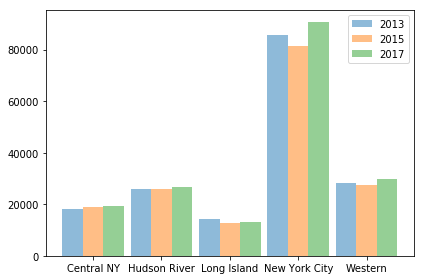

In [23]:
#define data
regions = ("Central NY", "Hudson River", "Long Island", "New York City", "Western")
regions_2013 = illness_by_region_2013["Mental Illness"].tolist()
regions_2015 = illness_by_region_2015["Mental Illness"].tolist()
regions_2017 = illness_by_region_2017["Mental Illness"].tolist()
n_groups = 5

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8


plot_2013 = plt.bar(index - bar_width, regions_2013, bar_width, alpha=0.5, align='center', label = "2013")
plot_2015 = plt.bar(index, regions_2015, bar_width, alpha=0.5, align ='center', label = "2015")
plot_2017 = plt.bar(index + bar_width, regions_2017, bar_width, align='center', alpha=0.5, label = "2017")

plt.xticks(index, regions)
plt.legend()
plt.tight_layout()
plt.savefig("New_York_Occurence.png")
plt.show()

As expected, we observe the greatest number of occurences in NYC opposed to other less populated regions

## Analyzing Other Factors contributing to Mental Illness

Here, we have a dataframe containing a boolean value for whether the patient suffers from a certain condition. It would be interesting to see what kind of patterns we can find regarding Mental Illness being "YES" and the number of other factors involved. The assumption is that the more YES responses, the more likely you'd be to 

In [7]:
pcs_2015_factors.head()

,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,...,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling
0,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO
2,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,...,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES
3,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO
4,NO,NO,YES,NO,NO,NO,NO,YES,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [27]:
row_yes_2015 = 0
yes_counts_2015 = []
names_2015 = pcs_2015_factors.columns
for i, row in pcs_2015_factors.iterrows():
    for name in names_2015:
        if row[name] == "YES":
            row_yes_2015 += 1
    yes_counts_2015.append(row_yes_2015)
    row_yes_2015 = 0

row_yes_2013 = 0
yes_counts_2013 = []
names_2013 = pcs_2013_factors.columns
for i, row in pcs_2013_factors.iterrows():
    for name in names_2013:
        if row[name] == "YES":
            row_yes_2013 += 1
    yes_counts_2013.append(row_yes_2013)
    row_yes_2013 = 0    

row_yes_2017 = 0
yes_counts_2017 = []
names_2017 = pcs_2017_factors.columns
for i, row in pcs_2017_factors.iterrows():
    for name in names_2017:
        if row[name] == "YES":
            row_yes_2017 += 1
    yes_counts_2017.append(row_yes_2017)
    row_yes_2017 = 0    



In [33]:
pcs_df_2015["Yes Count"] = yes_counts_2015
pcs_2015_analysis = pcs_df_2015[["Mental Illness", "Yes Count"]]
_groups_2015 = pcs_2015_analysis.groupby("Mental Illness").sum()

pcs_df_2013["Yes Count"] = yes_counts_2013
pcs_2013_analysis = pcs_df_2013[["Mental Illness", "Yes Count"]]
_groups_2013 = pcs_2013_analysis.groupby("Mental Illness").sum()

pcs_df_2017["Yes Count"] = yes_counts_2017
pcs_2017_analysis = pcs_df_2017[["Mental Illness", "Yes Count"]]
_groups_2017 = pcs_2017_analysis.groupby("Mental Illness").sum()

groups_2015 = _groups_2015["Yes Count"].tolist()
groups_2013 = _groups_2013["Yes Count"].tolist()
groups_2017 = _groups_2017["Yes Count"].tolist()

_groups_2015

,Yes Count
Mental Illness,
NO,18046
UNKNOWN,3624
YES,423944


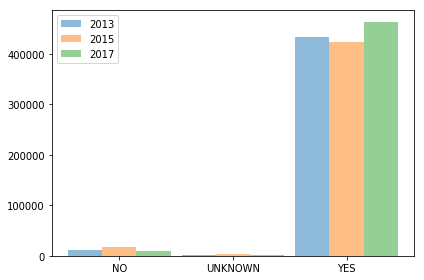

In [34]:
_n_groups = 3
outcomes = ["NO", "UNKNOWN", "YES"]
#create plot
fig, ax = plt.subplots()
index = np.arange(_n_groups)
bar_width = 0.3
opacity = 0.8


_plot_2013 = plt.bar(index - bar_width, groups_2013, bar_width, alpha=0.5, align='center', label = "2013")
_plot_2015 = plt.bar(index, groups_2015, bar_width, alpha=0.5, align ='center', label = "2015")
_plot_2017 = plt.bar(index + bar_width, groups_2017, bar_width, align='center', alpha=0.5, label = "2017")

plt.xticks(index, outcomes)
plt.legend()
plt.tight_layout()
plt.savefig("New_York_Factors.png")
plt.show()